In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

In [4]:
df = pd.read_csv("C5.AML1.full_set.csv",index_col=0)
#id_dict = {"MA0137.1":"STAT1","MA0050.1":"IRF1"}

In [8]:
keys = df.columns

In [55]:
'''
keys = ["MEIS1","PRDM1","HOXA9","ELF4","IRF9","MYBL2","SMAD3","CEBPE","HOXA10","HOXB2","NFIL3","GATA1",
              "IRF1","CEBPA","STAT1","BCL6","BHLHE40","FOSL1","FOSL2","KLF1","HOXB3","PBX3","HOXB4","ZBTB43",
              "HOXA3"]
values = ["MA0498.2","MA0508.1","MA0594.2","MA0641.1","MA0653.1","MA0777.1","MA0795.1","MA0837.1",
              "MA0899.1","MA0902.1","MA0025.1","MA0035.4","MA0050.1","MA0102.3","MA0137.1","MA0463.2",
              "MA0464.2","MA0477.1","MA0478.1","MA0493.2","MA0903.1","MA1114.1","MA1499.1","UN0148.1","UN0558.1"]
id_dict = dict(zip(values,keys))

In [16]:
genes_not_nan = []
for i in df["gr$nearestGene"]:
    if type(i)==str:
        genes_not_nan.append(i)

In [17]:
len(np.unique(genes_not_nan))

20335

In [18]:
mean_scores = pd.DataFrame()
for j in df.columns:
    if "Gene" not in j:
        gene_names = []
        score_list = []
        for i in np.unique(genes_not_nan):#np.unique(df["gr$nearestGene"]):
            tmp=np.asarray(df[df["gr$nearestGene"]==i][j])
            mean_motif = np.mean(tmp[np.nonzero(tmp)[0]])
            score_list.append(mean_motif)
            gene_names.append(i)
        mean_scores[j]=score_list

/home/lf2684/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lf2684/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [85]:
mean_scores.columns = [id_dict[i] for i in mean_scores.columns]

In [19]:
mean_scores.index = gene_names

In [20]:
mean_scores.to_csv("AML1_b0_mean_motif_score_FULL.csv")

In [19]:
mean_scores = pd.read_csv("AML3_b0_mean_motif_score_FULL.csv",index_col=0)

In [20]:
from pyjaspar import jaspardb
jdb_obj = jaspardb(release='JASPAR2020')
id_dict = {}
for i in mean_scores.columns:
    if "$" not in i:
        id_dict[i] = jdb_obj.fetch_motif_by_id(i).name
#mean_scores.columns = [i+" "+id_dict[i] for i in mean_scores.columns]

In [21]:
gene_names = mean_scores.index

In [5]:
#read in tet2 patients
p08a=sc.read_h5ad('16H008_allsorted_cleaned-Copy1.h5') #AML2
p89a=sc.read_h5ad('08H089_allsorted_cleaned-Copy1.h5') #AML1
p7a=sc.read_h5ad('AML7_allsorted_cleaned-Copy1.h5') #AML3

/home/lf2684/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/lf2684/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [22]:
ad = p7a
sc.pp.filter_genes(ad, min_counts=None, min_cells=ad.shape[0]*.01)

tfs=pd.read_csv("Human_TF_MotifList_v_1.01.txt",sep='\t')
import numpy as np
tfs_in=[]
for i in tfs["HGNC symbol"]:
    if i in ad.var_names and i in mean_scores.index:
        tfs_in.append(i)
        
tfs_filtered=np.unique(tfs_in)

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [7]:


#AML1
timesrt = ['MAFB', 'PRDM1', 'HIF1A', 'ARID5B', 'NR4A1', 'NR4A3', 'FOXO3', 'SMAD3',
       'ZNF267', 'BACH1', 'BHLHE40', 'AHR', 'GZF1', 'ZBTB43', 'MXD1', 'FOSL2',
       'BCL6', 'ZBTB7A', 'NFIL3', 'ELF4', 'IRF8', 'MYBL2', 'RUNX2', 'TP53',
       'CEBPE', 'HOXA3', 'HOXA10', 'HOXA9', 'CEBPA', 'MYC', 'MYB', 'KLF13',
       'HOXB3', 'MAFK', 'IKZF1', 'HLX', 'MEIS1', 'ZZZ3', 'NFE2', 'HOXB4',
       'PBX3']

In [15]:
#AML2 full
timesrt = ['IRF8', 'MAFB', 'BCL6', 'CEBPB', 'HES4', 'JUNB', 'PRDM1', 'HIF1A',
       'NFKB2', 'NFAT5', 'KLF7', 'FOSL2', 'MYBL2', 'E2F1', 'CEBPE', 'MXD1',
       'IRX3', 'CREB5', 'BHLHE40', 'RFX2', 'NFIL3', 'EGR1', 'DDIT3', 'HIVEP1',
       'KLF2', 'ATF3', 'JUN', 'HOXB3', 'ZNF117', 'AHR', 'HOXA3', 'ETS1',
       'TCF3', 'ZNF711', 'NR4A1']

In [23]:
#AML3 full
timesrt = ['SMAD3', 'HES4', 'POU2F2', 'RBPJ', 'MNT', 'JDP2', 'BACH1', 'BHLHE40',
       'RXRA', 'KLF4', 'SPI1', 'MBD2', 'KLF6', 'ZBTB7A', 'NFIL3', 'ZNF787',
       'ZBTB18', 'ZNF217', 'ARID3A', 'HLX', 'ELF4', 'MEF2D', 'KLF13', 'NR3C1',
       'ZNF281', 'HOXA3', 'ERF', 'UBP1', 'HOXB3', 'HOXA10', 'MEIS1', 'RUNX1',
       'HOXA9', 'GFI1', 'CREB3L2', 'BCL11A', 'ZNF90', 'MYBL2', 'CEBPE',
       'DNMT1', 'GTF3A', 'NFE2', 'HMGA1', 'KLF1', 'MYC', 'MYB', 'ETV6', 'HHEX',
       'HOXA7', 'LYL1', 'ZNF22']

In [24]:
len(tfs_filtered)

566

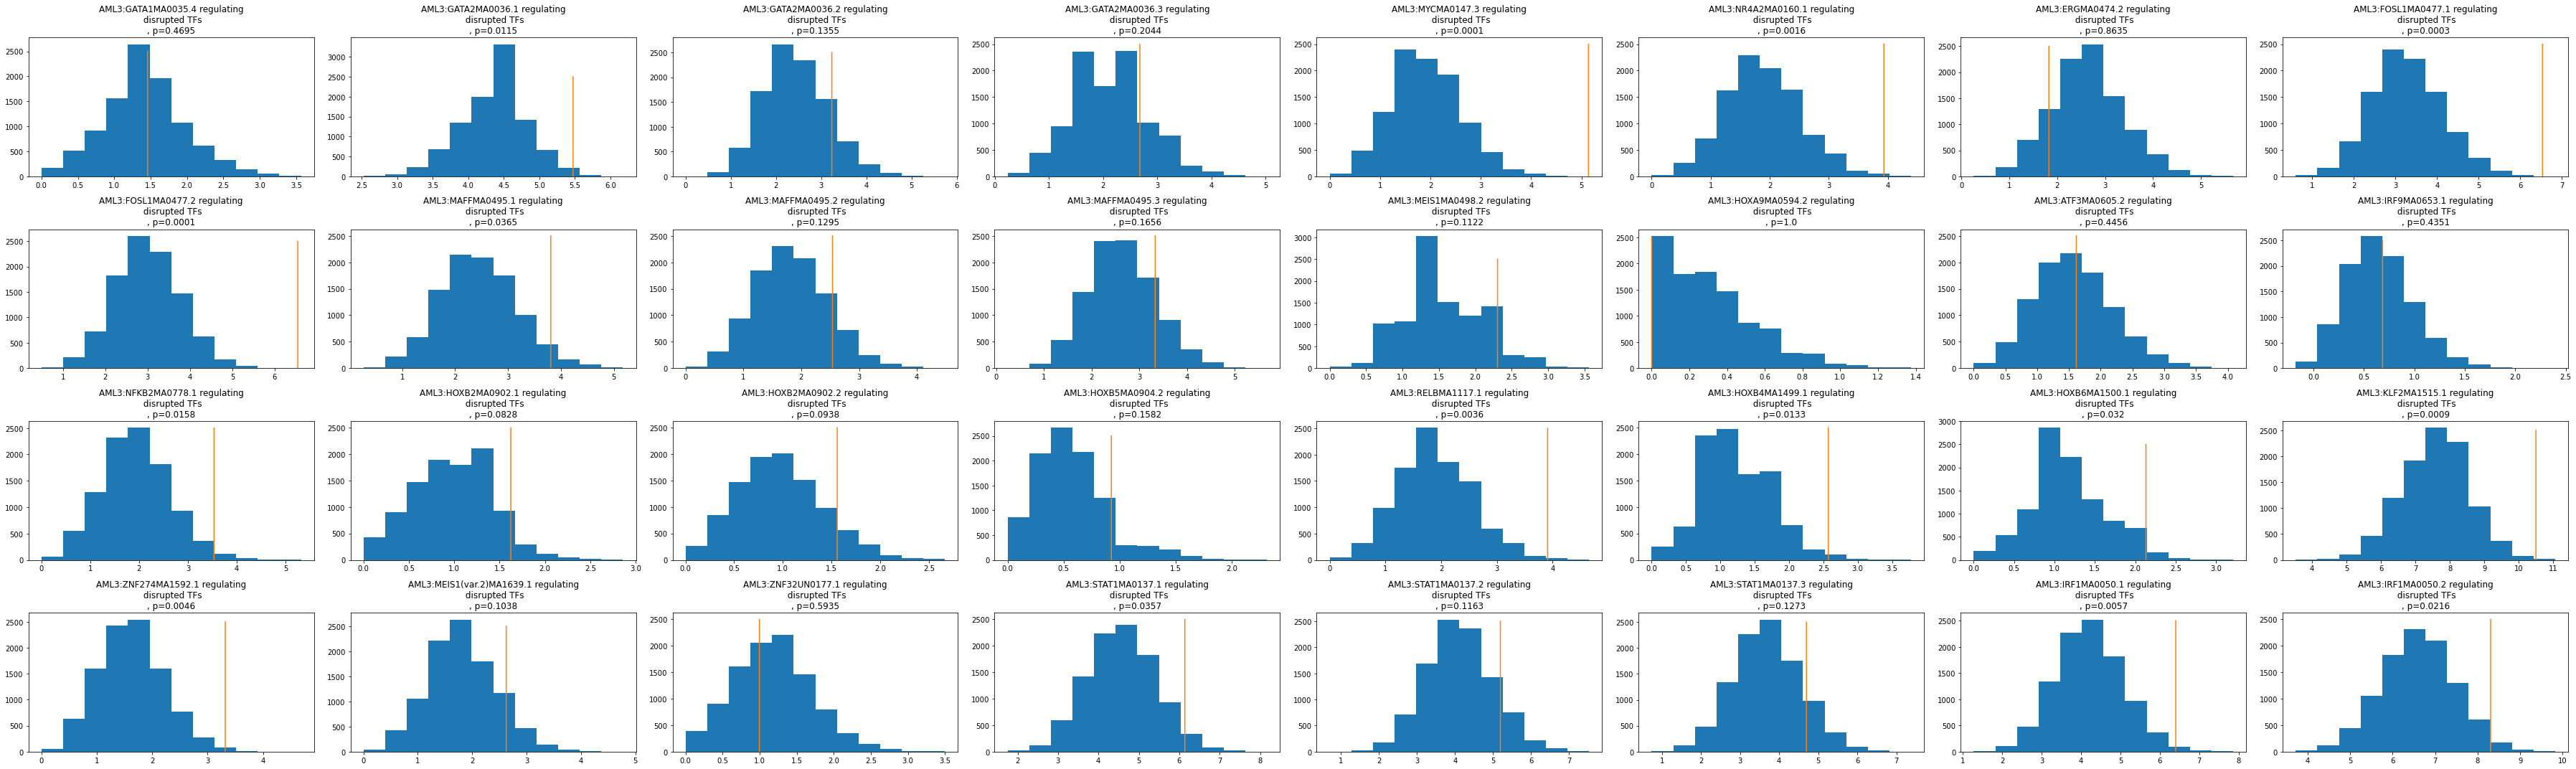

In [25]:
fig,ax = plt.subplots(4,8,figsize=(50,15))
results = pd.DataFrame()

for j in range(mean_scores.shape[1]):
    idd = mean_scores.columns[j]
    gene = id_dict[idd]
    sset_means = mean_scores.loc[[i for i in timesrt if i in gene_names]]
    sset_means = sset_means[[i for i in mean_scores.columns if i in sset_means.columns]]
    #drop the gene from the set of disrupted genes if it is there 
    if gene in sset_means.index:
        sset_means = sset_means.drop(gene,axis=0)

    #tfs = mean_scores.loc[tfs_in]
    
    other = [i for i in tfs_filtered if i not in timesrt]

    null = mean_scores.loc[other]

    our_value = sset_means[idd].fillna(0).mean()

    samples = []
    for i in range(10000):
        sample = null.loc[np.random.choice(null.index,sset_means.shape[0])]
        samples.append(sample[idd].fillna(0).mean())

    counts = 0
    for i in samples:
        if i>=our_value:
            counts+=1
    p = counts/10000

    ax[j//8][j%8].hist(samples,bins=12)
    ax[j//8][j%8].plot([our_value for i in range(2500)],np.arange(0,2500))
    ax[j//8][j%8].set_title("AML3:"+gene+mean_scores.columns[j]+ " regulating\n disrupted TFs\n, p="+str(p))
    results[gene+mean_scores.columns[j]]=[p]
plt.tight_layout()
plt.savefig("AML3 motif p values")

In [10]:
le_grand_results = pd.DataFrame()
le_grand_results["AML1"] = results.T[0]

In [18]:
le_grand_results["AML2"] = results.T[0]

In [26]:
le_grand_results["AML3"] = results.T[0]

In [27]:
le_grand_results[(le_grand_results["AML1"]<.05)&(le_grand_results["AML2"]<.05)&(le_grand_results["AML3"]<.05)]

,AML1,AML2,AML3
FOSL1MA0477.1,0.0011,0.0057,0.0003
FOSL1MA0477.2,0.0000,0.0086,0.0001
HOXB4MA1499.1,0.0029,0.0458,0.0133
HOXB6MA1500.1,0.0007,0.0059,0.0320


In [28]:
le_grand_results

,AML1,AML2,AML3
GATA1MA0035.4,0.0007,0.3939,0.4695
GATA2MA0036.1,0.0001,0.5604,0.0115
GATA2MA0036.2,0.0423,0.0154,0.1355
GATA2MA0036.3,0.0003,0.0309,0.2044
MYCMA0147.3,0.0450,0.2716,0.0001
NR4A2MA0160.1,0.0272,0.2301,0.0016
ERGMA0474.2,0.6634,0.8829,0.8635
FOSL1MA0477.1,0.0011,0.0057,0.0003
FOSL1MA0477.2,0.0000,0.0086,0.0001
MAFFMA0495.1,0.0000,0.2989,0.0365


In [13]:
IFN1 = ['IRF1',
'IFIH1',
'IFITM3',
'DDX58',
'IFI44L',
'IFI6',
'IFITM2',
'NAMPT',
'OASL',
'RTP4',
'TREX1',
'ADAR',
'FAM46C',
'LY6E',
'MCOLN2',
'APOBEC3G',
'IL15',
'ISG15',
'MX1',
'TLR3',]

timesrt = ['GATA1','KLF1', 'FOSL1', 'CREB5',
       'HOXB2', 'PBX3', 'HOXB4',
       'MEIS1', 'HLX', 'HOXB3', 'CEBPA', 'HOXA9', 'HOXA3', 'CEBPE',
       'MYBL2', 'ELF4', 'NFIL3', 'BCL6', 'FOSL2', 'ZBTB43', 'AHR', 'BHLHE40',
       'SMAD3', 'PRDM1', 'MAFB']


sset_means = mean_scores.loc[[i for i in IFN1 if i in gene_names]]
sset_means = sset_means[[i for i in timesrt if i in sset_means.columns]]

In [14]:
for gene in timesrt:
    if gene in mean_scores.columns:
        our_value = sset_means[gene].fillna(0).mean()

        samples = []
        for i in range(10000):
            null = mean_scores.loc[np.random.choice(mean_scores.index,len(IFN1))]
            null = null[gene]
            samples.append(null.mean())

        counts = 0
        for i in samples:
            if i>our_value:
                counts+=1
        p = counts/10000
        print(gene, p)

GATA1 0.4456
FOSL1 0.6447
HOXB2 0.9488
PBX3 0.9851
HOXB4 0.9427
MEIS1 0.0
HOXB3 0.9656
CEBPA 0.0027
HOXA9 0.4399
CEBPE 0.2717
MYBL2 0.5478
ELF4 0.3058
NFIL3 0.9599
BCL6 0.642
FOSL2 0.9789
ZBTB43 0.9679
BHLHE40 0.8383
SMAD3 0.741
PRDM1 0.9941


Text(0.5, 1.0, 'Significance of disrupted TFs \nregulating IFN1 vs other genes, p=1.0')

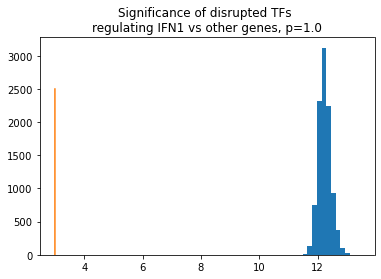

In [162]:
plt.hist(samples,bins=12)
plt.plot([our_value for i in range(2500)],np.arange(0,2500))
plt.title("Significance of disrupted TFs \nregulating IFN1 vs other genes, p="+str(p))

In [166]:
mhc_genes = [
    "HLA-DM", "HLA-DMA", "HLA-DMB", "HLA-DO", "HLA-DOA", "HLA-DOB",
    "HLA-DP", "HLA-DPA1", "HLA-DPB1", "HLA-DQ", "HLA-DQA1", "HLA-DQA2",
    "HLA-DQB1", "HLA-DQB2", "HLA-DR", "HLA-DRA", "HLA-DRB1", "HLA-DRB3",
    "HLA-DRB4", "HLA-DRB5"
]

sset_means = mean_scores.loc[[i for i in mhc_genes if i in gene_names]]
sset_means = sset_means[[i for i in timesrt if i in sset_means.columns]]

In [165]:
our_value = sset_means.fillna(0).mean().mean()

In [167]:
samples = []
for i in range(10000):
    null = mean_scores.loc[np.random.choice(mean_scores.index,len(mhc_genes))]
    null = null[[i for i in timesrt if i in sset_means.columns]]
    samples.append(null.mean().mean())

In [168]:
counts = 0
for i in samples:
    if i>our_value:
        counts+=1
p = counts/10000
print(p)

1.0


Text(0.5, 1.0, 'Significance of disrupted TFs \nregulating MHC-II vs other genes, p=1.0')

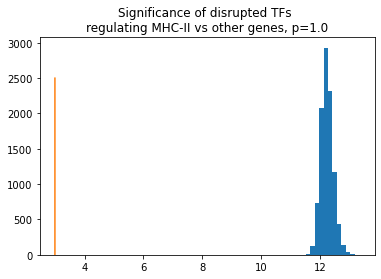

In [169]:
plt.hist(samples,bins=12)
plt.plot([our_value for i in range(2500)],np.arange(0,2500))
plt.title("Significance of disrupted TFs \nregulating MHC-II vs other genes, p="+str(p))